# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.

print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 720 duplicate rows.


In [5]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()

In [7]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 0 duplicate rows.


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [10]:
# * Which column has the most null values and how many null values does it have?

print('The column that has the most null values is', df.isnull().sum().idxmax())

The column that has the most null values is Engine HP


In [70]:
# * Print how long our dataframe is.

print('The length of the datafram is', len(df.index))

The length of the datafram is 11194


In [11]:
# * Remove any row that has a null value in it. 

#df[~df.isnull().any(axis=1)] returns the dataframe with all rows that DO NOT have null values
df = df[~df.isnull().any(axis=1)]

In [12]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print('The length of the datafram is', len(df.index))

The length of the datafram is 11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:>

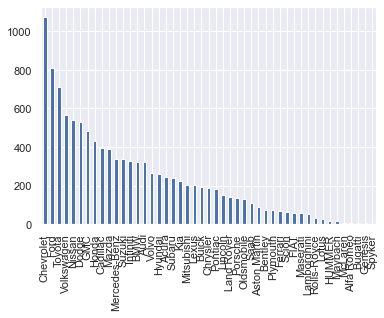

In [99]:
# Make a bar chart that displays how many times each brand of car appears in this data. 


df['Make'].value_counts().plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:>

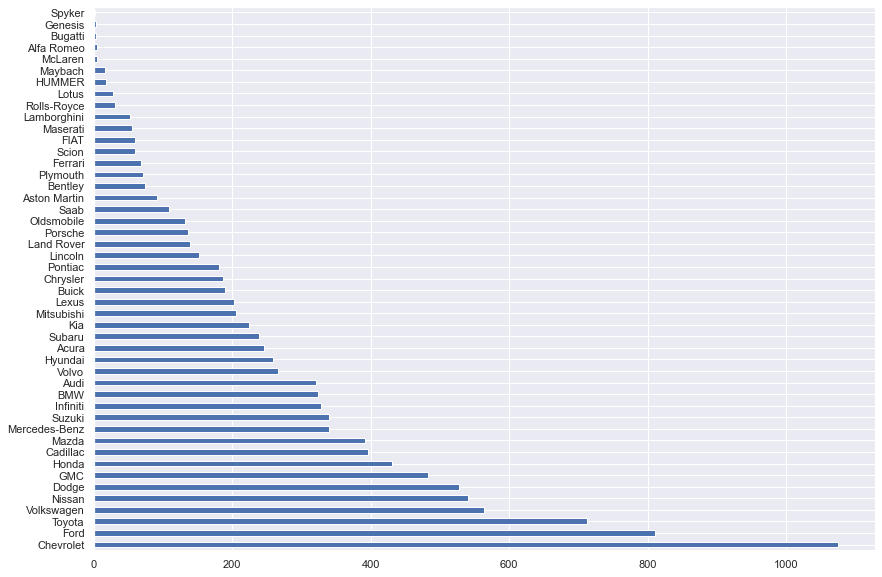

In [101]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

df['Make'].value_counts().plot(kind='barh',figsize=(14,10))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


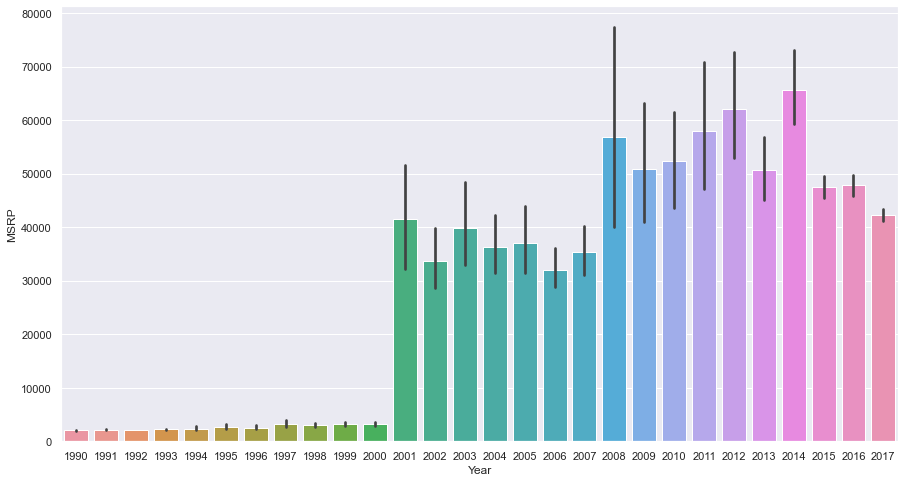

In [114]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

#df.plot(kind='hist', x='Year', y='MSRP')

#graph = sns.histplot(data=df, x='Year', y='MSRP')

#graph a barplot
sns.barplot(data=df, x='Year', y='MSRP')

#Change size of the seaborn plot 
sns.set(rc = {'figure.figsize':(30,16)})

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [8]:
# Make a column where is 10 when year is less than 2000, else 1.

# Multiply the MSRP by the price adjuster.

#condition, all cars <= the year 2000
AdjustedYear = df['Year'] <= 2000

#create new adjusted price column and if it meets the condition, multiply the price by 10. Otherwise keep the MSRP the same 
df['adjusted_price'] = np.where(AdjustedYear, df['MSRP'] * 10, df['MSRP'])

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

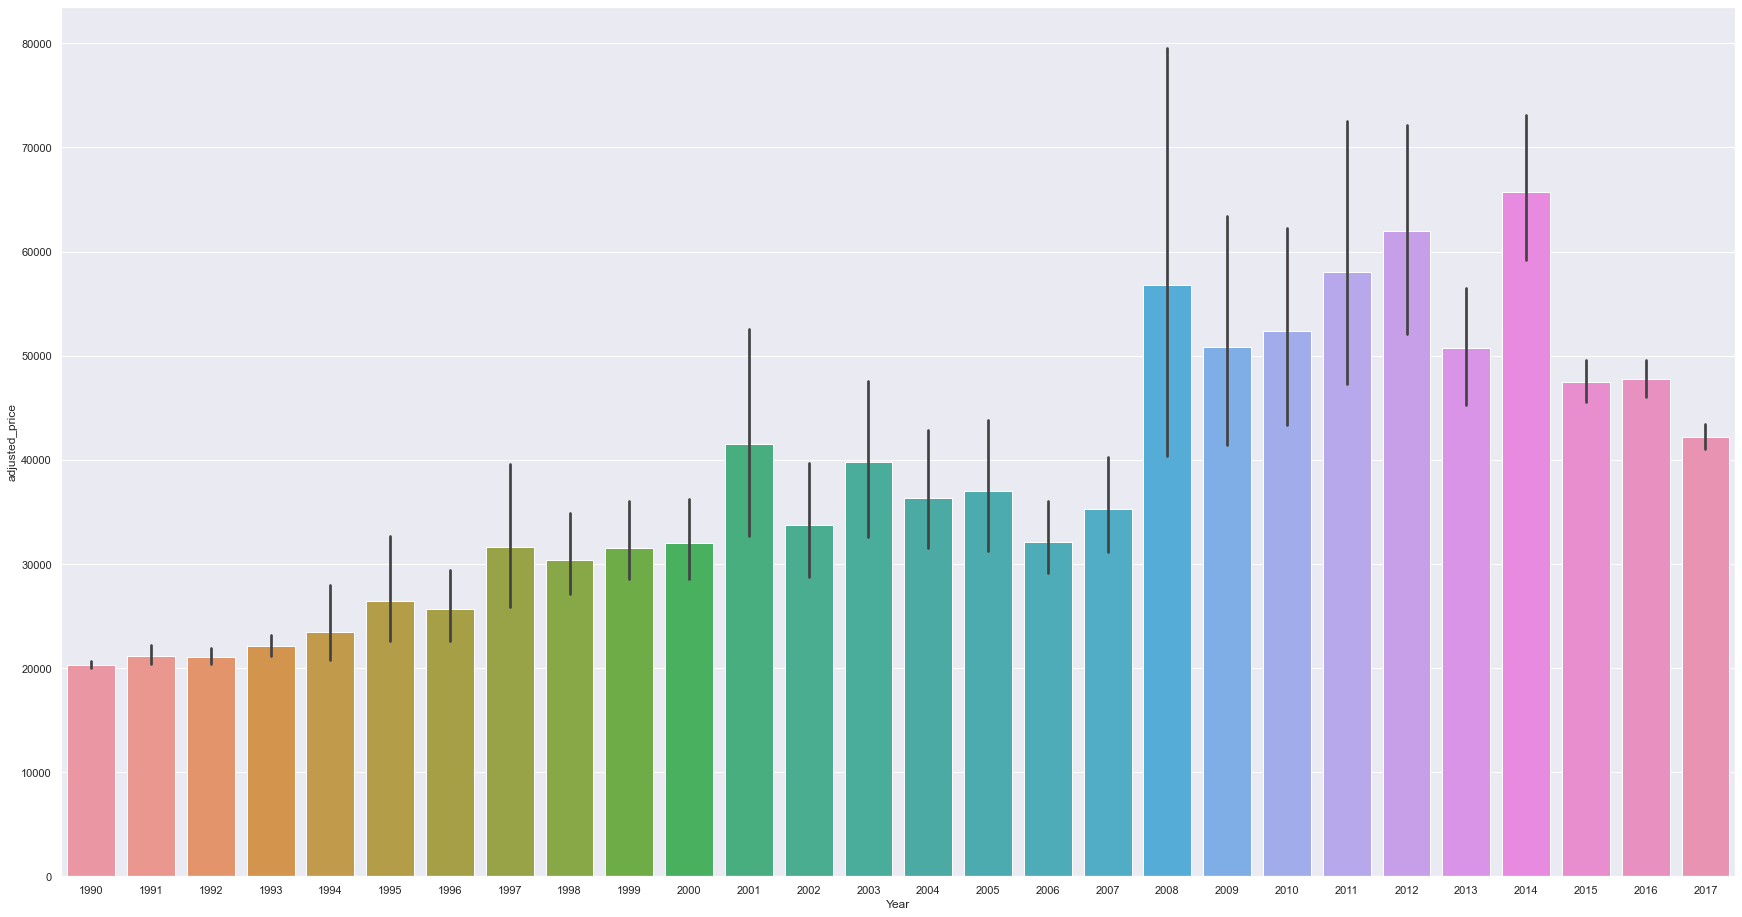

In [123]:
# Plot new prices

#graph a barplot
sns.barplot(data=df, x='Year', y='adjusted_price')

#Change size of the seaborn plot 
sns.set(rc = {'figure.figsize':(30,16)})

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [20]:
# What are the top 5 car makers make the most expensive cars on average. 

#Group the Make of the cars 
gb = tempdf.groupby('Make')

#Take the mean value of each Make 
averagePrice = gb['adjusted_price'].mean()

#Sort the most expensive cars on average in ascending order, then print out the tail 
averagePrice.sort_values(ascending=True).tail()

Make
Bentley        2.471693e+05
Lamborghini    3.315673e+05
Rolls-Royce    3.511306e+05
Maybach        5.462219e+05
Bugatti        1.757224e+06
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [25]:
# Which car makers have the highest median highway MPG?

#Group the Make of the cars 
gb = tempdf.groupby('Make')

#Take the mean value of each Make 
averageMPG = gb['highway MPG'].mean()

#Sort the highest median highway MPG on average in descending order, then print out the head
averageMPG.sort_values(ascending=False).head()

Make
Tesla         98.944444
FIAT          37.338710
Alfa Romeo    34.000000
Volkswagen    32.529930
Honda         32.399538
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

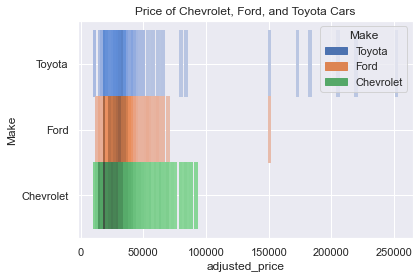

In [40]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

car_brands = ['Chevrolet', 'Ford', 'Toyota']

condition = df['Make'].isin(car_brands)

tempdf = df[condition]

graph = sns.histplot(data=tempdf,x="adjusted_price",y="Make", hue='Make')
graph.set_title("Price of Chevrolet, Ford, and Toyota Cars");

# Remake the same histogram, but limit the x-axis from 0 to 100,000

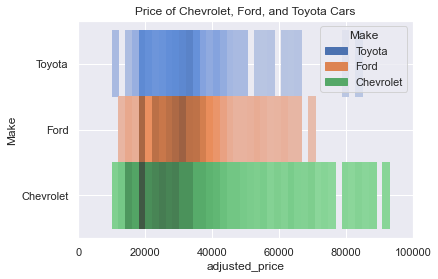

In [41]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

car_brands = ['Chevrolet', 'Ford', 'Toyota']

condition = df['Make'].isin(car_brands)

tempdf = df[condition]

graph = sns.histplot(data=tempdf,x="adjusted_price",y="Make", hue='Make')
graph.set_title("Price of Chevrolet, Ford, and Toyota Cars");
graph.set_xlim(left=0, right=100000);

# Plot the relationship between Engine HP and highway MPG

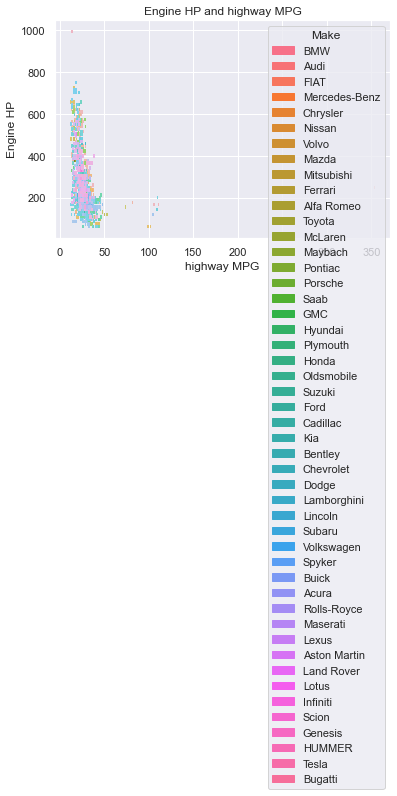

In [46]:
# Plot the relationship between Engine HP and highway MPG

graph = sns.histplot(data=df, x='highway MPG', y='Engine HP', hue="Make")
graph.set_title("Engine HP and highway MPG");

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

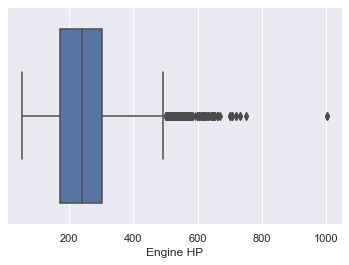

In [47]:
# create a boxplot for the 'Engine HP'

graph = sns.boxplot(data=df, x='Engine HP');

# Make another boxplot for highway MPG

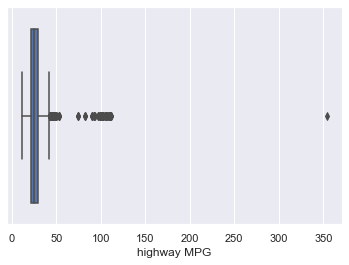

In [49]:
# create a boxplot for the 'highway MPG'

graph = sns.boxplot(data=df, x='highway MPG');

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [55]:
# Remove any  outliers from Engine HP and highway MPG 

#Calculate Q1, Q3, and then define the Inter Quartile Range
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['Engine HP'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['Engine HP'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]




#Calculate Q1, Q3, and then define the Inter Quartile Range
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['highway MPG'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['highway MPG'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]

# Remake the boxplots for both Engine HP and highway MPG


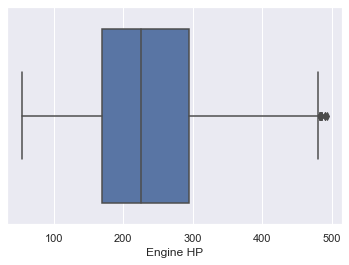

In [54]:
# Engine HP boxplot

graph = sns.boxplot(data=df, x='Engine HP');

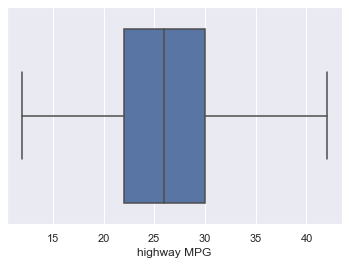

In [56]:
# highway MPG boxplot

graph = sns.boxplot(data=df, x='highway MPG');

# Make a scatter plot of Engine HP vs highway MPG

Text(0.5, 1.0, 'Engine HP compared to highway MPG')

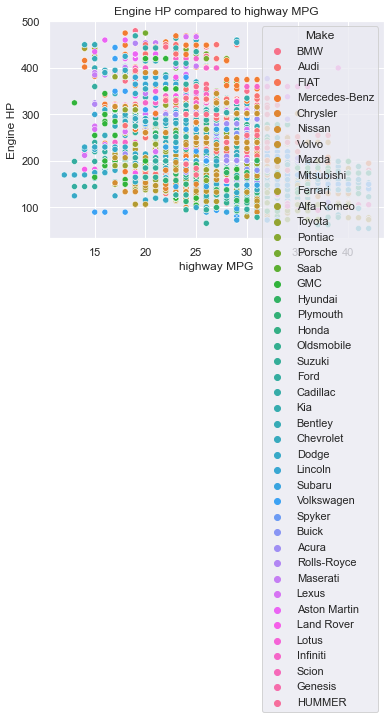

In [61]:
# Make a scatter plot of Engine HP vs highway MPG

graph = sns.scatterplot(data=df, x='highway MPG', y='Engine HP', hue='Make');
graph.set_title("Engine HP compared to highway MPG")

# What does this plot tell you about how Engine HP affects highway MPG?

In [63]:
# What does this plot tell you about how Engine HP affects highway MPG?

print("There doesn't seem to be any correlation between Engine HP and highway MPG")

There doesn't seem to be any correlation between Engine HP and highway MPG


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

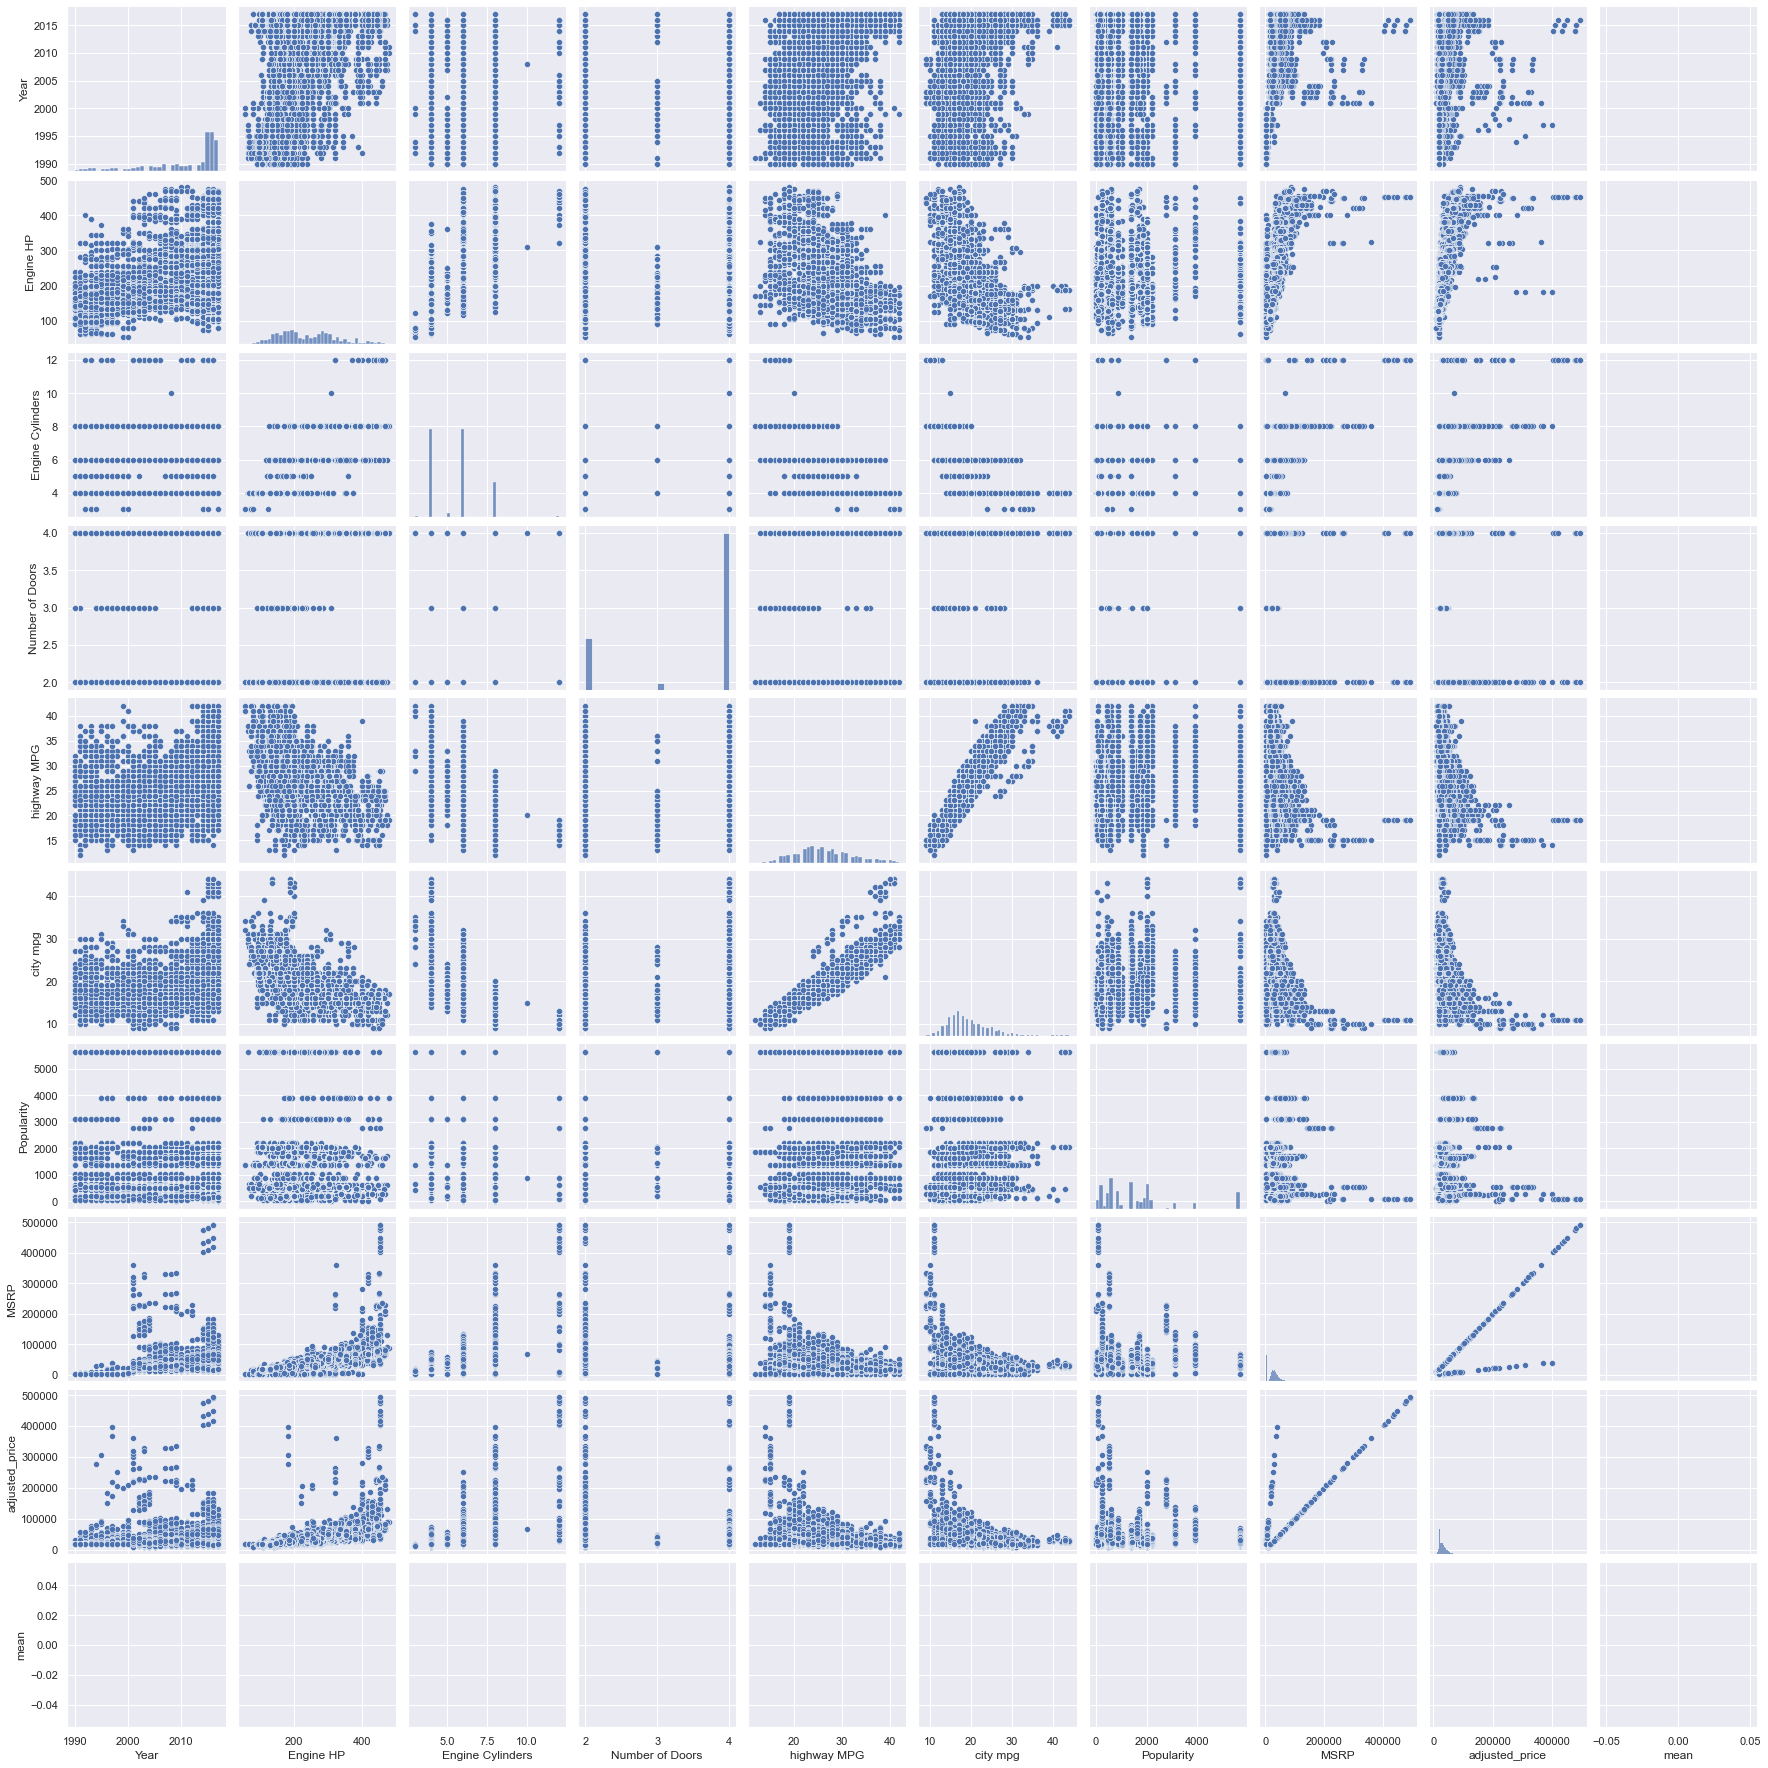

In [67]:
# Using a pairplot, display all of the linear relationship.

#sns.pairplot(df, hue="Make");

sns.pairplot(df);

In [69]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print("It Looks like Highway MPG and City MPG have a strong linear relationship")

It Looks like Highway MPG and City MPG have a strong linear relationship


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

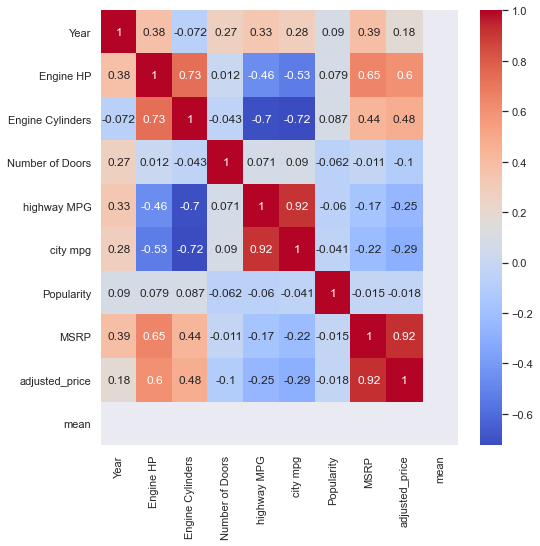

In [80]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

sns.set(rc={'figure.figsize':(8,8)})
graph = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [87]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print("Engine HP has the strongest relationship with Engine Cylinders.\nThis is likely because when car makers make cars with larger HP, they also make it with more cylinders")

Engine HP has the strongest relationship with Engine Cylinders.
This is likely because when car makers make cars with larger HP, they also make it with more cylinders


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [97]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

#Turns all column names fully lowercase
df.columns = df.columns.str.lower()

#Replaces all instances of ' ' with an underscore in columns
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'adjusted_price', 'mean'],
      dtype='object')
